In [1]:
# This cell is used for creating a button that hides/unhides code cells to quickly look only the results.
# Works only with Jupyter Notebooks.

import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    # JupyterHub
    course_data_dir = '/coursedata'
elif os.path.isdir('../../../coursedata'):
    # Local installation
    course_data_dir = '../../../coursedata'
else:
    # Docker
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

The data directory is /coursedata
Data stored in /coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7
The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

### Name: Aitor Urruticoechea
### Student Number: 101444219

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms, which are listed in the table above. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2.  (idf is the logarithm term on slide 69 of Lecture 6 where values $n_i/N$ are given in the table above.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

IDF
{'cat': 4.321928094887363, 'dog': 2.321928094887362, 'mammals': 5.643856189774724, 'mouse': 3.321928094887362, 'pet': 0.7369655941662062}

TF: query
[0.25, 0.0, 0.25, 0.25, 0.25]
TF: documents
{'D1': [0.16666666666666666, 0.16666666666666666, 0.0, 0.16666666666666666, 0.5], 'D2': [0.25, 0.25, 0.25, 0.25, 0.0], 'D3': [0.5, 0.25, 0.0, 0.25, 0.0]}



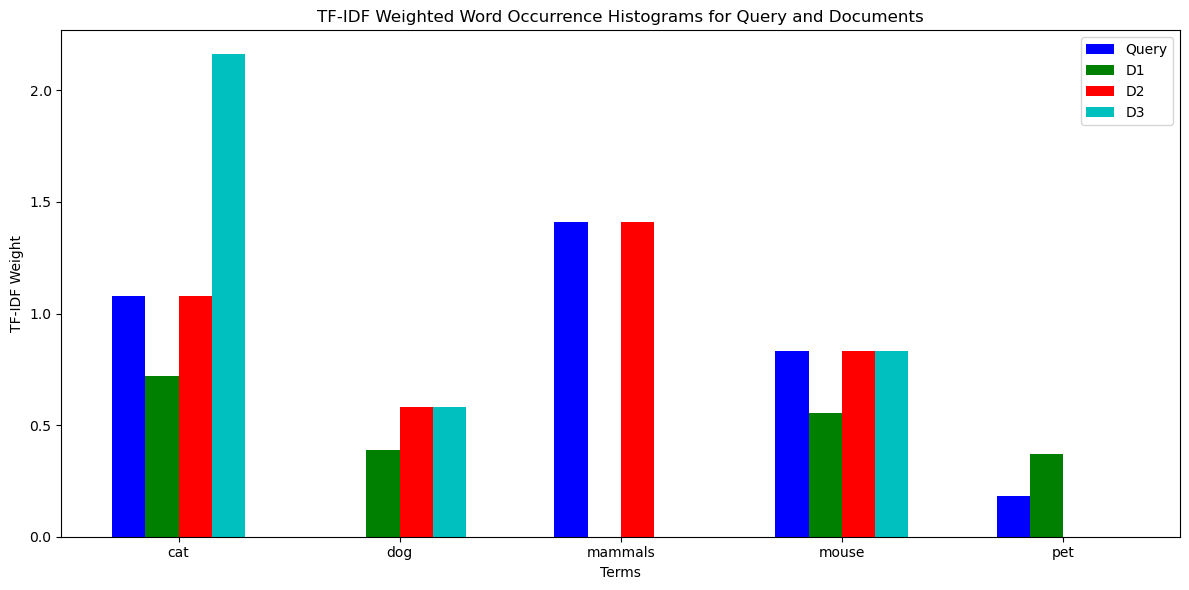

Cosine Similarity
[('D2', 0.9546948111493487), ('D3', 0.6431937393302419), ('D1', 0.6288846426378089)]



In [9]:
## Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##

import matplotlib.pyplot as plt

# Given percentages of documents containing each term

percentages = {
    "cat": 5,
    "dog": 20,
    "mammals": 2,
    "mouse": 10,
    "pet": 60
}
N = 100 

# Computing IDF for each term
idf = {term: np.log2(N / (percentage)) for term, percentage in percentages.items()}

print("IDF")
print(idf)
print("")

# Query and Terms
query = ["mouse", "cat", "pet", "mammals"]
terms = ["cat", "dog", "mammals", "mouse", "pet"]

# (asuming pre-processed documents)
documents = {
    "D1": ["cat", "pet", "dog", "pet", "mouse", "pet"],
    "D2": ["cat", "dog", "mouse", "mammals"],
    "D3": ["cat", "dog", "cat", "mouse"]
}

# Calculating TF for the query and each document
def compute_tf(term, document):
    return document.count(term) / len(document)

tf_query = [compute_tf(term, query) for term in terms]

tf_documents = {
    doc_id: [compute_tf(term, doc) for term in terms]
    for doc_id, doc in documents.items()
}

print("TF: query")
print(tf_query)
print("TF: documents")
print(tf_documents)
print("")

# TF-IDF weitghtd score
idf_values = np.array([idf[term] for term in terms])

tf_idf_query = np.array(tf_query) * idf_values
tf_idf_documents = {doc_id: np.array(tf_doc) * idf_values for doc_id, tf_doc in tf_documents.items()}


# Create the plots
plt.figure(figsize=(12, 6))

terms = ["cat", "dog", "mammals", "mouse", "pet"]
bar_width = 0.15
index = np.arange(len(terms))

plt.bar(index, tf_idf_query, bar_width, label='Query', color='b')
plt.bar(index + bar_width, tf_idf_documents['D1'], bar_width, label='D1', color='g')
plt.bar(index + 2 * bar_width, tf_idf_documents['D2'], bar_width, label='D2', color='r')
plt.bar(index + 3 * bar_width, tf_idf_documents['D3'], bar_width, label='D3', color='c')

plt.xlabel('Terms')
plt.ylabel('TF-IDF Weight')
plt.title('TF-IDF Weighted Word Occurrence Histograms for Query and Documents')
plt.xticks(index + 1.5 * bar_width, terms)
plt.legend()

plt.tight_layout()
plt.show()

# Cosine similarity
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    return dot_product / (norm1 * norm2)

similarity_scores = {doc_id: cosine_similarity(tf_idf_query, tf_idf_vector)
                     for doc_id, tf_idf_vector in tf_idf_documents.items()}

print("Cosine Similarity")
print(sorted(similarity_scores.items(), key=lambda item: item[1], reverse=True))
print("")

##--your-code-ends-here--##

## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particular case.<br> 
(Hint: Precision and recall are explained on slide 67 of Lecture 6 and there is a good explanation also in Wikipedia.)

Type your answer here:

$$
Precision = \frac{Relevant~retrieved~instances}{All~retrieved~instances} = \frac{300}{300+50} = 0.857
$$

$$
Recall = \frac{Relevant~retrieved~instances}{All~relevant~instances} = \frac{300}{500} = 0.6
$$

## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)
Stage I.B (two questions)
Stage I.C (one question)

Part2 (one question)

Part3:
Stage III.A (three questions)
Stage III.B (one question)
Stage III.C (two questions)

Answering questions in part 1 corresponds to one bonus point and parts 2 and 3 together correspond to one additional point. Hence, in total this third task is worth of 2 points, whereas the previous tasks (Exercise 1 and Exercise 2) are both worth of 1 point so that in total this homework round is worth of 4 points.

Type your answers here: 

- **Stage I.A** <br>
_Note the change in density of detections across the image. Why does it change? Will it be a problem for matching? How could it be avoided?_
The density of feature detections changes due to variations in texture, contrast, and scale between regegions of the two images. Areas with rich textures, distinct edges, and strong contrast are more likely to result in a higher density of feature points. This kind of uneneven density can be problematic for matching because it may lead to situations where some areas have a rich set of features while others are sparsely represented. This imbalance can make it difficult to find reliable correspondences between images, especially if one image has a significantly different distribution of features than the other. This can be mitigated by, for instance, enhancing image contrast to boost visibility of features in low-density regions, or by combining this method with other feature detectors (ORB, SURF...). <br>
_Occasionally, a feature is detected multiple times, with different orientations. This may happen when the orientation assignment is ambiguous. Which kind of image structure would result in ambiguous orientation assignment?_ This typically happens in regions of the image where there is a lack of distinct gradient information. I.e., uniform regions with little to no texture; corners or T-junctions; or areas with minimal contrast between adjacent pixels.

- **Stage I.B** <br>
_Note the descriptors are computed over a much larger region (shown in blue) than the detection (shown in green). Why?_
Computing descriptors over a larger region makes sense, actually, because it improves invariance and discriminability of the features extracted by SIFT. This makes the method much more effective at matching, especially in real-world applications where images can vary significantly due to changes in perspective, illumination, etc.
- **Stage I.C** <br>
_Examine some of the remaining mismatches to understand why they have occurred. How could they be removed?_
Expanding on the already answered question IA;  there are recurrent mistakes in areas with low visibility (poorly illuminated, blurry, ill-defined borders...). Contrast-enhancing techniques can be, of course, of use, as well as using scale-invariant approaches instead. There are, however, edge cases with difficult approaches, like window reflections and the like, which may need other more nuanced approaches.

- **Part 2** <br>
_The transformation between the images induced by the plane is a planar homography. The detections are only affine co-variant (not as general as a planar homography). So how can descriptors computed on these detections possibly match?_
The descriptors can match because SIFT is invariant to changes in scale, rotation, and partially invariant to affine transformations.

- **Stage III.A** <br>
_The size of the vocabulary (the number of clusters) is an important parameter in visual word algorithms. How does the size affect the number of inliers and the difficulty of computing the transformation?_ <br>

_In the above procedure the time required to convert the descriptors into visual words was not accounted for. Why?_ <br>

_What is the speedup in searching a large, fixed database of 10, 100, 1000 images?_


- **Stage III.B** <br>
_How many erroneously matched images do you count in the top results? Why does the top image have a score of 1 (0.9698... see the NOTE above)?_


- **Stage III.C** <br>
_Why is the top score much larger than 1 now? Are the retrieval results improved after geometric verification?_